# Labmentix-Internship-Amazon-Prime-IMDb-Score-Predictor

## Project Overview

* This project, undertaken as part of a Labmentix AI/ML Engineering Internship, focuses on developing a machine learning model to predict IMDb scores for movies available on Amazon Prime Video. By leveraging a dataset comprising movie details such as runtime, TMDB popularity, TMDB score, genre, and production countries, the project aims to provide a valuable tool for predicting movie ratings.

# 3Project Structure and Methodology

## The project followed a structured approach, encompassing the following key stages:

## 1. Data Acquisition and Preparation:

* The project utilized two datasets: credits.csv and titles.csv, containing movie credits and title information, respectively.
* These datasets were loaded using the pandas library and merged based on the common 'id' column.
* Missing values were handled using median imputation for numerical features and 'Unknown' or 'No Description' for categorical features.
* Categorical features like 'genres' and 'production_countries' were transformed into lists.
*Feature engineering was performed to create new features such as genre_count, country_count, and is_movie.
*The features runtime, tmdb_popularity, tmdb_score, genre_count, country_count, and is_movie were selected as input features. The target variable was imdb_score.

## 2. Model Training and Evaluation:

* The dataset was split into training and testing sets using train_test_split from scikit-learn.
* A RandomForestRegressor model was chosen for its ability to handle complex relationships in the data.
* Hyperparameter tuning was performed using RandomizedSearchCV to optimize the model's performance.
* The best performing model was saved using joblib.
# Model performance was evaluated using the R² score, and overfitting was assessed by comparing training and testing scores.

## 3. Streamlit Application Development:

* A Streamlit web application was developed to provide an interactive interface for predicting IMDb scores.
* The trained model was loaded into the Streamlit app.
* Users can input movie details through the Streamlit interface.
* The application predicts and displays the IMDb score, and if a matching movie is found in the data, the actual IMDb score and the entire movie row is displayed.
* The R² score of the model on the test dataset is displayed.
* A sample of actual vs predicted scores is also displayed.

## 4. Deployment:

* The project was deployed using Streamlit Cloud, utilizing a GitHub repository to store the code, data, and trained model.
* Relative file paths were used to ensure the application could access necessary files in the cloud environment.
* A requirements.txt file was created to manage dependencies.
* The model was retrained using the same version of scikit-learn as the streamlit cloud, to prevent version inconsistency warnings.

## 4. Key Libraries Used:

* numpy: For numerical computations.
* pandas: For data manipulation and analysis.
* scikit-learn: For machine learning model development and evaluation.
* joblib: For saving and loading the trained model.
* streamlit: For developing the web application.

## GitHub Repository:

https://github.com/kulurunagavardhanreddy/Labmentix-Internship-Amazon-Prime-IMDb-Score-Predictor/tree/main

## 1. Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib
import os
from scipy.stats import randint
from sklearn.metrics import r2_score

* We begin by importing the necessary Python libraries. numpy and pandas are essential for data manipulation. matplotlib and seaborn will be used for creating visualizations. From scikit-learn, we import tools for model training, hyperparameter tuning, and evaluation. joblib helps us save and load our trained model. os is used for interacting with the operating system, like creating directories. scipy.stats provides statistical functions, specifically randint for hyperparameter tuning. Finally, r2_score is used to evaluate the model's performance.

## 2. Loading the Datasets:

In [3]:
# Load datasets
credits_path = r"C:\Users\nag15\OneDrive\Desktop\Labmentix\Amazon_ML_Project\credits.csv"
titles_path = r"C:\Users\nag15\OneDrive\Desktop\Labmentix\Amazon_ML_Project\titles.csv"

In [4]:
def load_data(credits_path, titles_path):
    df1 = pd.read_csv(credits_path)
    df2 = pd.read_csv(titles_path)
    df = pd.merge(df1, df2, on='id', how='inner')
    return df

In [5]:
df = load_data(credits_path, titles_path)

* Next, we define the file paths for the credits.csv and titles.csv datasets. We then create a function load_data that reads these CSV files using pandas and merges them into a single DataFrame based on the common 'id' column. This merged DataFrame df will be used for further analysis.

In [6]:
df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


## 3. Handling Missing Values:

In [7]:
# Handle missing values
def handle_missing_values(df):
    df.fillna({
        'character': 'Unknown',
        'description': 'No Description',
        'imdb_id': 'No IMDb ID',
        'imdb_score': df['imdb_score'].median(),
        'imdb_votes': df['imdb_votes'].median(),
        'tmdb_popularity': df['tmdb_popularity'].median(),
        'tmdb_score': df['tmdb_score'].median()
    }, inplace=True)
    return df

In [8]:
df = handle_missing_values(df)

* We define a function handle_missing_values to deal with missing data. For categorical columns like 'character', 'description', and 'imdb_id', we fill missing values with 'Unknown' or 'No Description'. For numerical columns like 'imdb_score', 'imdb_votes', 'tmdb_popularity', and 'tmdb_score', we use the median value to impute missing entries. This helps ensure our model has complete data to work with.

## 4. Feature Engineering:

In [9]:
# Convert genre and country columns into lists
df['genres'] = df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['production_countries'] = df['production_countries'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

In [10]:
# Feature Engineering
df['genre_count'] = df['genres'].apply(len)
df['country_count'] = df['production_countries'].apply(len)
df['is_movie'] = (df['type'] == 'MOVIE').astype(int)

* Here, we perform feature engineering. We convert the 'genres' and 'production_countries' columns, which contain comma-separated strings, into lists. Then, we create new features: genre_count (the number of genres), country_count (the number of production countries), and is_movie (a binary indicator of whether the content is a movie). These new features can provide valuable information to our model.

## 5. Feature Selection and Target Definition:

In [11]:
# Selecting Features and Target (Age Certification Removed)
features = ['runtime', 'tmdb_popularity', 'tmdb_score', 'genre_count', 'country_count', 'is_movie']
target = 'imdb_score'

In [12]:
X = df[features]
y = df[target]

* We specify the features we want to use for our model (features) and the target variable we want to predict (target). We then create X (the feature matrix) and y (the target vector) from our DataFrame.

## 6. Correlation Heatmap:

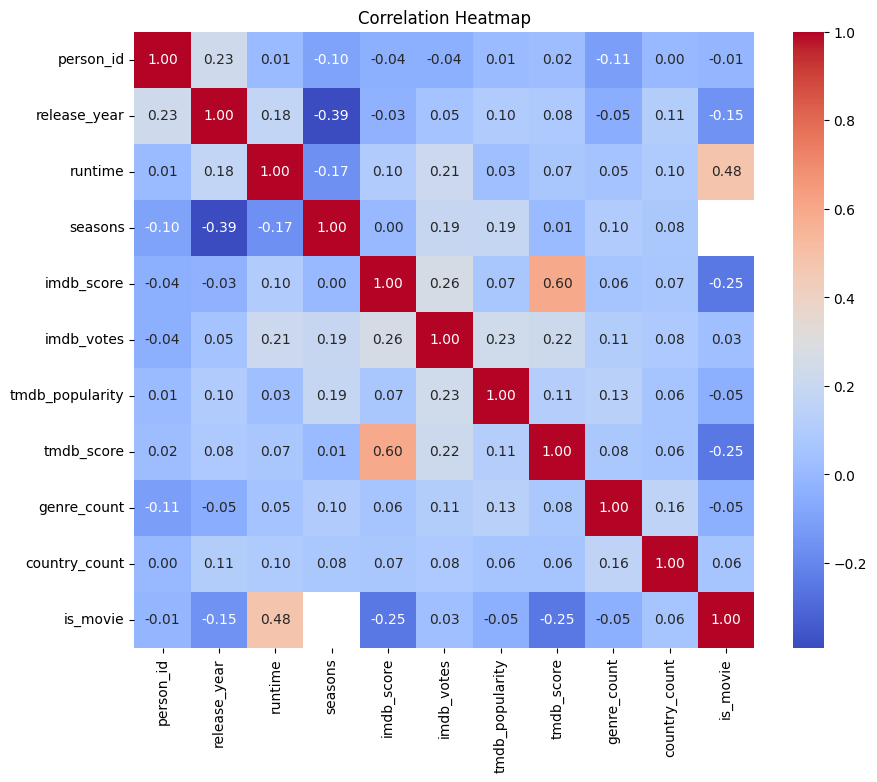

In [13]:
# Correlation Heatmap (excluding 'id' column)
numeric_df = df.drop('id', axis=1).select_dtypes(include=np.number) #create dataframe that only contain numbers, and drops the id column.
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* To understand the relationships between our numerical features, we create a correlation heatmap. First, we create a new DataFrame numeric_df that only contains numerical columns, dropping the 'id' column. Then, we use seaborn to visualize the correlation matrix.

## 7. Feature Distribution Visualizations:

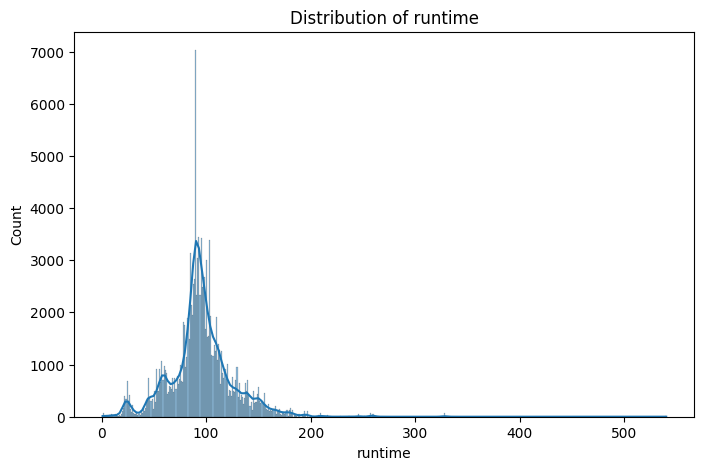

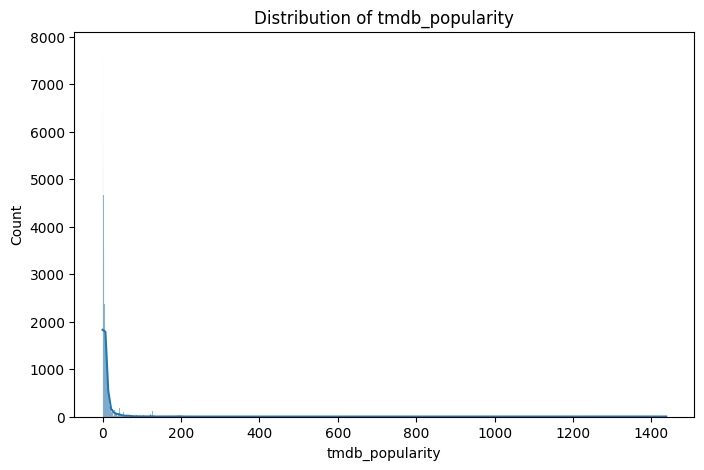

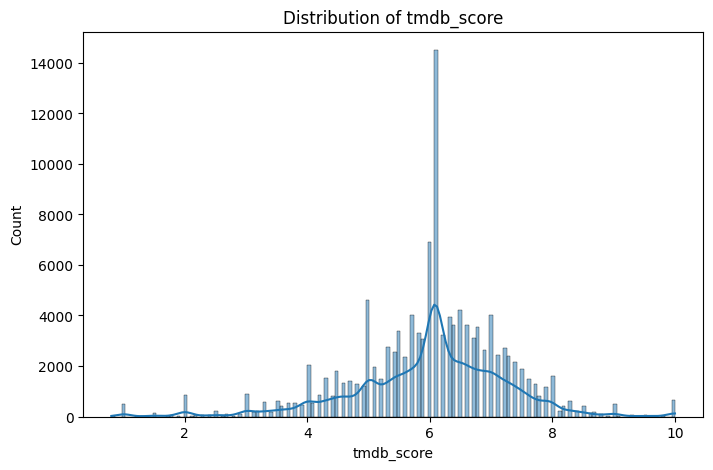

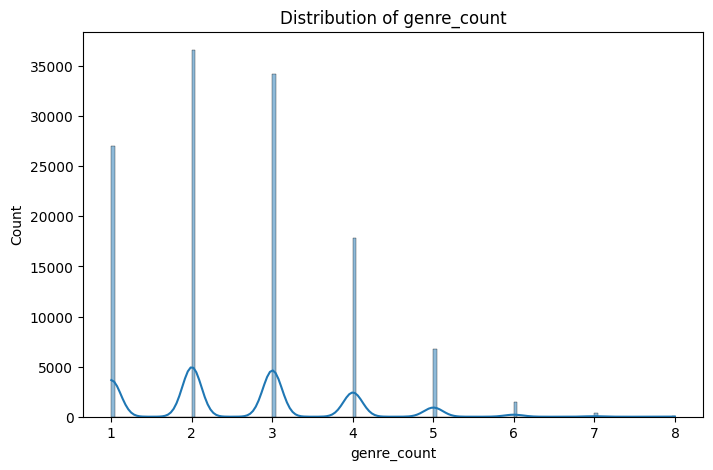

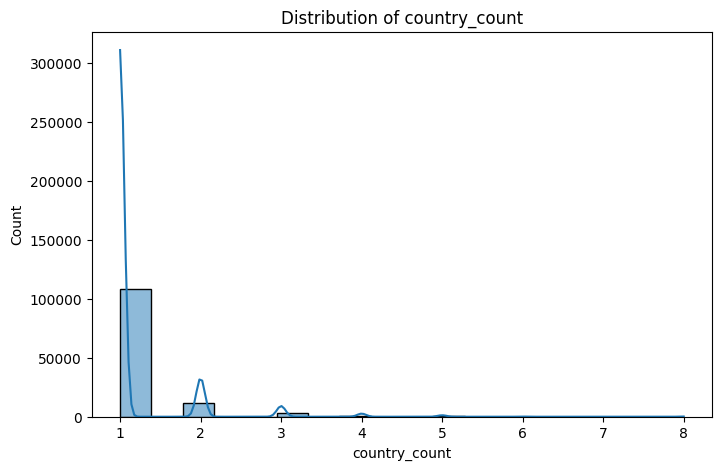

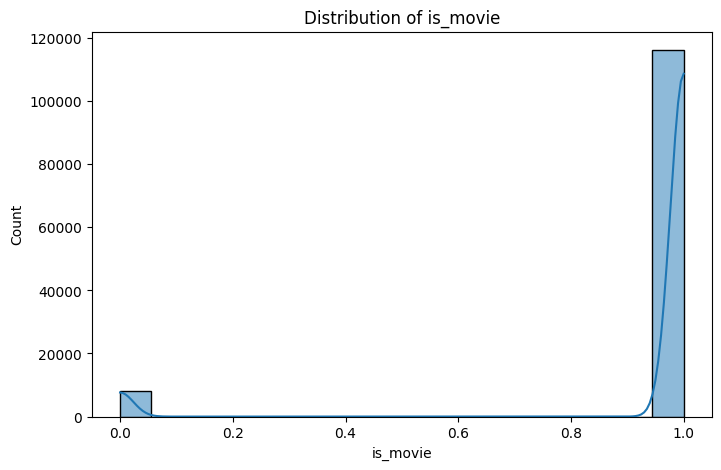

In [14]:
# Feature Distribution Visualization
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

* We visualize the distribution of each feature using histograms. This helps us understand the spread and shape of the data for each feature

## 8. Splitting the Dataset:

In [15]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* We split our dataset into training and testing sets. The training set will be used to train our model, and the testing set will be used to evaluate its performance. test_size=0.2 means we allocate 20% of the data to the testing set, and random_state=42 ensures reproducibility.

## 9. Model Training and Hyperparameter Tuning:

In [16]:
# Model Training (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning (RandomizedSearchCV)
param_dist = {
    'n_estimators': randint(10, 50),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_iter=50, n_jobs=-1, verbose=2, random_state=42, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


* We initialize a Random Forest Regressor model. Then, we define a parameter distribution for hyperparameter tuning using RandomizedSearchCV. This method searches for the best combination of hyperparameters. We fit the grid search to the training data and extract the best model.

## 10. Model Saving and Evaluation:

In [17]:
# Saving the Model
model_path = r"C:\Users\nag15\OneDrive\Desktop\Labmentix\Amazon_ML_Project\models\best_model.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump((best_model, X.columns), model_path)
print(f"Best model saved at {model_path}")

Best model saved at C:\Users\nag15\OneDrive\Desktop\Labmentix\Amazon_ML_Project\models\best_model.pkl


In [18]:
# Overfitting Check (Training Score)
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, best_model.predict(X_test))
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R^2 Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Potential Overfitting Detected.")
else:
    print("Model appears to generalize well.")

Training R² Score: 0.9874
Testing R^2 Score: 0.9785
Model appears to generalize well.


* We save the trained model using joblib. We then evaluate the model's performance using the R² score on both the training and testing sets. We also check for potential overfitting by comparing these scores

## 11. Feature Importance Analysis:

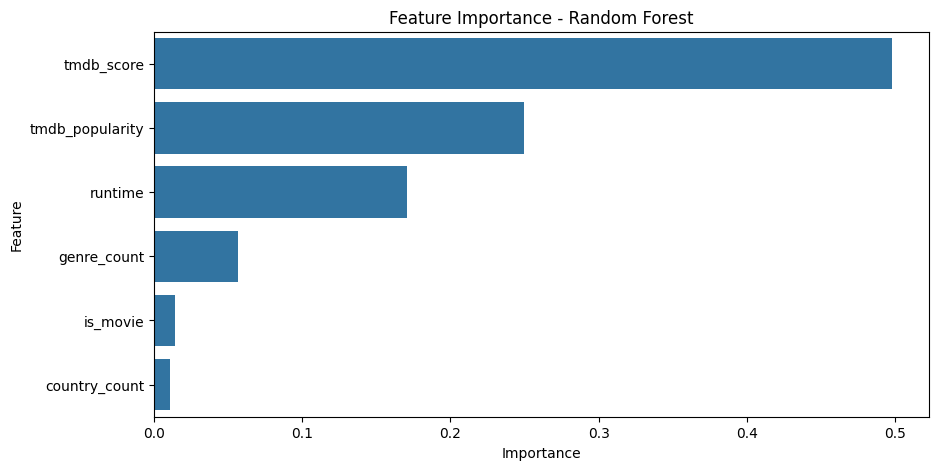

In [19]:
# Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()

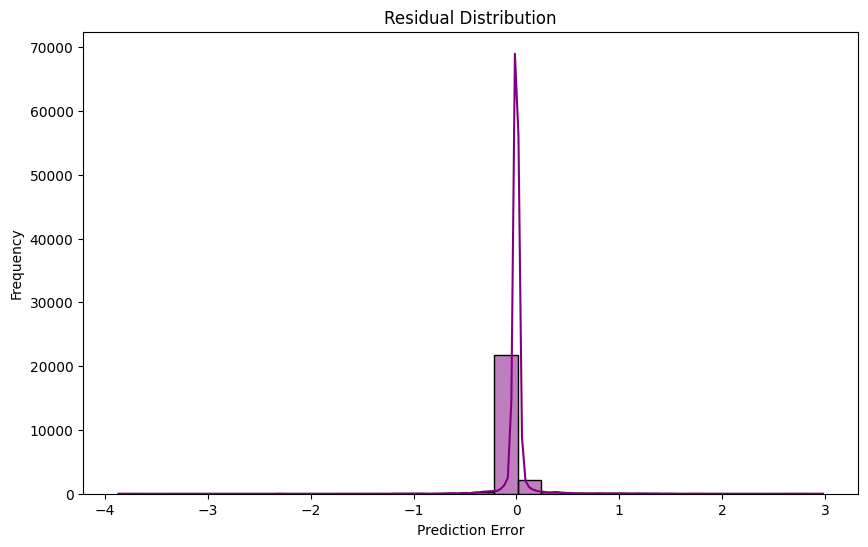

In [20]:
# Residual Analysis
plt.figure(figsize=(10, 6))
sns.histplot(y_test - best_model.predict(X_test), bins=30, kde=True, color="purple")
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

# Conclusion

* This project successfully developed and deployed a machine learning model for predicting IMDb scores of Amazon Prime movies. The Streamlit application provides a user-friendly way to interact with the model. The project demonstrates the application of machine learning techniques in a real-world scenario and highlights the importance of data preprocessing, model selection, and deployment strategies.